> __Purpose:__ Find ways to reduce the dimensionality of EMG data so that we don't need to store so much data, but we can still achieve similar accuracies. 

1. Make EMG Envelope: moving average OR RMS -- 100 ms windows, no overlap -- end up with ~200 samples for the 20 second window at the beginning and end
2. PCA on the channels - decrease # of channels, run PCA on all participants to find X significant axes (somewhere between 3-6), and then apply the same transformation to all participants
3. Then do ML

-- 7 Subjects, therefore pure guessing would be 14.28% correct on average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
#import random
from kcs_ml_infr import *
from experiment_params import *

#random.seed(a=1)

# Load In Data

Load in the other data
> This cell takes forever to run...

In [3]:
t0 = time.time()

emg_data_df1 = pd.read_csv("Data\emg_full_data1.csv")
emg_labels_df1 = pd.read_csv("Data\emg_full_labels1.csv")
emg_data_df2 = pd.read_csv("Data\emg_full_data2.csv")
emg_labels_df2 = pd.read_csv("Data\emg_full_labels2.csv")

t1 = time.time()
total = t1-t0  
print(total)

94.14320659637451


In [4]:
emg_data_df = pd.concat((emg_data_df1, emg_data_df2))
emg_labels_df = pd.concat((emg_labels_df1, emg_labels_df2))

In [5]:
print(emg_data_df.shape)
emg_data_df.drop('Unnamed: 0', axis=1, inplace=True)
emg_data_df.head()

(7168, 20771)


,0,1,2,3,4,5,6,7,8,9,...,20760,20761,20762,20763,20764,20765,20766,20767,20768,20769
0,0.0,0.0,0.0,10.778148,10.778148,10.778148,26.874088,43.189501,43.189501,38.594581,...,54.343173,54.343173,53.363208,53.363208,53.363208,53.363208,59.557374,59.557374,59.557374,55.634152
1,0.0,0.0,0.0,9.891218,9.891218,9.891218,23.589349,36.477933,36.477933,31.296507,...,79.894291,79.894291,86.860329,86.860329,86.860329,86.860329,71.319955,71.319955,71.319955,56.606641
2,0.0,0.0,0.0,1.606057,1.606057,1.606057,8.623857,15.845217,15.845217,17.957593,...,89.500295,89.500295,84.266738,84.266738,84.266738,84.266738,71.979639,71.979639,71.979639,65.918534
3,0.0,0.0,0.0,3.668527,3.668527,3.668527,7.165376,11.628290,11.628290,15.308951,...,68.943668,68.943668,66.983974,66.983974,66.983974,66.983974,64.104558,64.104558,64.104558,61.848159
4,0.0,0.0,0.0,1.411810,1.411810,1.411810,9.707134,15.677262,15.677262,18.922410,...,43.565918,43.565918,42.343590,42.343590,42.343590,42.343590,42.235306,42.235306,42.235306,41.818073


In [6]:
print(emg_labels_df.shape)
emg_labels_df.drop('Unnamed: 0', axis=1, inplace=True)
emg_labels_df.head()

(7168, 4)


,Subject,Condition,Channel
0,METACPHS_S106,0,0
1,METACPHS_S106,0,1
2,METACPHS_S106,0,2
3,METACPHS_S106,0,3
4,METACPHS_S106,0,4


In [7]:
labels_df = pd.DataFrame(emg_labels_df['Subject'].map(key_to_num))
labels_df.head()

,Subject
0,0
1,0
2,0
3,0
4,0


# Filtered EMG Data Privacy Evaluation
>Linking EMG Data to Participants
1. Does the channel matter / improve performance? Within the same block (assuming different blocks have the strap re-put on) then presumably the same muscles should act in similar ways.  __Just do PCA on it and don't worry about it__
2. Does the condition matter? Presumably, but the question is how much.  __Only look at condition for conditions that changed performance (eg learning rate speed)__
3. Ways to compress the input data: PCA/LDA/nonlinearversion, or norms of the vectors... is it even necessary / beneficial to performance.  __Focus on just PCA for now__
4. __No standard scaler since negative filtered EMG data has no meaning__

## 1) Create Envelope of Filtered EMG Data

In [16]:
assert(1==0)
# Don't run the below cell cause it takes forever, but keep the output

AssertionError: 

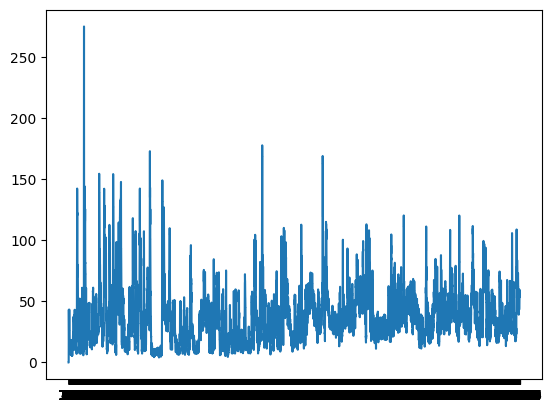

205.9365212917328


In [11]:
t0 = time.time()

plt.plot(emg_data_df.iloc[0, :])
plt.show()

t1 = time.time()
total = t1-t0  
print(total)

Crude moving average with no overlap

In [8]:
envelope_df50 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//50, axis=1).mean()
envelope_df100 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//100, axis=1).mean()
envelope_df150 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//150, axis=1).mean()
envelope_df200 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//200, axis=1).mean()
envelope_df250 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//250, axis=1).mean()
envelope_df300 = emg_data_df.groupby(np.arange(len(emg_data_df.columns))//250, axis=1).mean()

envelope_df50.to_csv("Data\envelope_df50.csv")
envelope_df100.to_csv("Data\envelope_df100.csv")
envelope_df150.to_csv("Data\envelope_df150.csv")
envelope_df200.to_csv("Data\envelope_df200.csv")
envelope_df250.to_csv("Data\envelope_df250.csv")
envelope_df300.to_csv("Data\envelope_df300.csv")

print(envelope_df100.shape)
envelope_df100.head()

(7168, 208)


,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,14.129705,11.959808,28.685874,33.823858,42.311438,22.872970,28.686864,91.792338,26.813570,28.583164,...,43.676011,39.113891,27.947874,31.573392,36.614566,35.604320,51.523493,31.292127,59.277122,51.997711
1,13.895036,12.063848,22.026072,27.027048,59.187831,23.013614,30.960467,81.718608,29.116355,28.694447,...,41.396844,44.348191,31.188022,30.580405,32.773796,39.768986,51.494867,29.641406,47.146682,58.581918
2,13.214033,15.229451,23.956005,25.832507,48.218284,29.437285,27.001414,35.878805,29.420835,31.587059,...,27.507856,35.271588,28.060107,24.463167,30.750010,39.033112,31.714344,17.286340,30.174009,49.750919
3,13.979167,16.414878,19.550628,21.984005,32.083749,26.856702,23.001818,21.776800,23.041464,24.603026,...,21.163787,27.844200,26.265045,24.563413,29.984113,35.764448,23.072423,15.670036,22.936556,38.122263
4,10.168381,10.501039,12.856129,16.059131,20.128401,13.435236,16.672336,18.134148,20.744904,21.606347,...,14.751494,19.967234,19.091210,16.293000,20.945203,25.093296,14.147869,10.369884,15.788238,26.206604


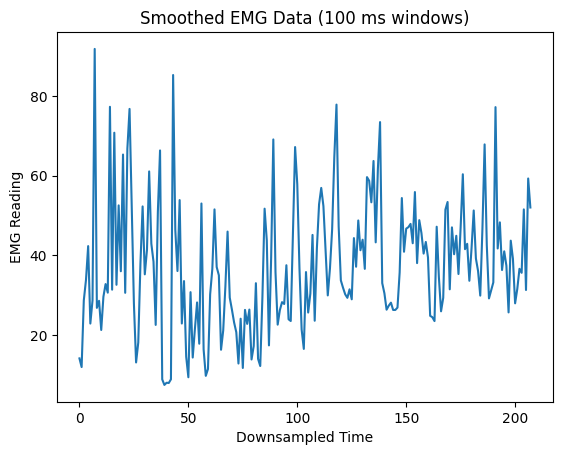

In [10]:
# This is substantially different than the original lol
plt.plot(envelope_df100.iloc[0, :])
plt.xlabel("Downsampled Time")
plt.ylabel("EMG Reading")
plt.title("Smoothed EMG Data (100 ms windows)")
plt.show()

Using the rolling function

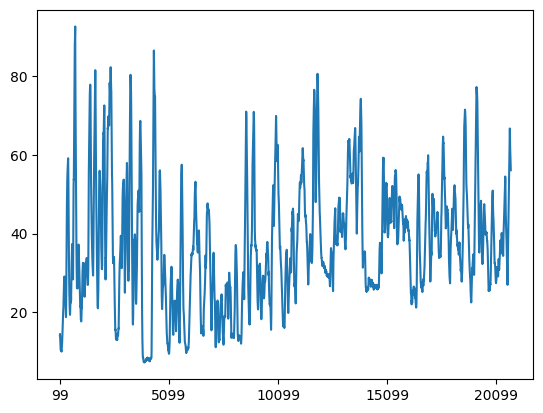

In [10]:
ex = emg_data_df.iloc[0, :].rolling(window=100).mean().dropna().plot()

# A Bunch of Old PCA Stuff...

In [ ]:
assert(1==0)

## 2) PCA On the Channels
> https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

> "It is essential to perform feature scaling before running PCA if there is a significant difference in the scale between the features of the dataset; for example, one feature ranges in values between 0 and 1 and another between 100 and 1,000. PCA is very sensitive to the relative ranges of the original features. We can apply z-score standardization to get all features into the same scale by using Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn."

In [11]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Here, pca.components_ has shape [n_components, n_features]. Thus, by looking at the PC1 (First Principal Component) which is the first row: [0.52237162 0.26335492 0.58125401 0.56561105]] we can conclude that feature 1, 3 and 4 (or Var 1, 3 and 4 in the biplot) are the most important. This is also clearly visible from the biplot (that's why we often use this plot to summarize the information in a visual way).

To sum up, look at the absolute values of the Eigenvectors' components corresponding to the k largest Eigenvalues. In sklearn the components are sorted by explained_variance_. The larger they are these absolute values, the more a specific feature contributes to that principal component.



In [12]:
print(envelope_df.shape)
envelope_df.head()

(7232, 208)


,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,14.129705,11.959808,28.685874,33.823858,42.311438,22.872970,28.686864,91.792338,26.813570,28.583164,...,43.676011,39.113891,27.947874,31.573392,36.614566,35.604320,51.523493,31.292127,59.277122,51.997711
1,13.895036,12.063848,22.026072,27.027048,59.187831,23.013614,30.960467,81.718608,29.116355,28.694447,...,41.396844,44.348191,31.188022,30.580405,32.773796,39.768986,51.494867,29.641406,47.146682,58.581918
2,13.214033,15.229451,23.956005,25.832507,48.218284,29.437285,27.001414,35.878805,29.420835,31.587059,...,27.507856,35.271588,28.060107,24.463167,30.750010,39.033112,31.714344,17.286340,30.174009,49.750919
3,13.979167,16.414878,19.550628,21.984005,32.083749,26.856702,23.001818,21.776800,23.041464,24.603026,...,21.163787,27.844200,26.265045,24.563413,29.984113,35.764448,23.072423,15.670036,22.936556,38.122263
4,10.168381,10.501039,12.856129,16.059131,20.128401,13.435236,16.672336,18.134148,20.744904,21.606347,...,14.751494,19.967234,19.091210,16.293000,20.945203,25.093296,14.147869,10.369884,15.788238,26.206604


Let's restrict it to just the first condition of the first participant, so just the first 64 rows (64 channels)

In [13]:
first_subj_df = envelope_df.iloc[:64, :]

print(first_subj_df.shape)
first_subj_df.head()

(64, 208)


,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,14.129705,11.959808,28.685874,33.823858,42.311438,22.872970,28.686864,91.792338,26.813570,28.583164,...,43.676011,39.113891,27.947874,31.573392,36.614566,35.604320,51.523493,31.292127,59.277122,51.997711
1,13.895036,12.063848,22.026072,27.027048,59.187831,23.013614,30.960467,81.718608,29.116355,28.694447,...,41.396844,44.348191,31.188022,30.580405,32.773796,39.768986,51.494867,29.641406,47.146682,58.581918
2,13.214033,15.229451,23.956005,25.832507,48.218284,29.437285,27.001414,35.878805,29.420835,31.587059,...,27.507856,35.271588,28.060107,24.463167,30.750010,39.033112,31.714344,17.286340,30.174009,49.750919
3,13.979167,16.414878,19.550628,21.984005,32.083749,26.856702,23.001818,21.776800,23.041464,24.603026,...,21.163787,27.844200,26.265045,24.563413,29.984113,35.764448,23.072423,15.670036,22.936556,38.122263
4,10.168381,10.501039,12.856129,16.059131,20.128401,13.435236,16.672336,18.134148,20.744904,21.606347,...,14.751494,19.967234,19.091210,16.293000,20.945203,25.093296,14.147869,10.369884,15.788238,26.206604


Repeat process but for labels

In [14]:
print(emg_labels_df.shape)
emg_labels_df.head()

(7232, 3)


,Subject,Condition,Channel
0,METACPHS_S106,0,0
1,METACPHS_S106,0,1
2,METACPHS_S106,0,2
3,METACPHS_S106,0,3
4,METACPHS_S106,0,4


In [15]:
print(labels_df.shape)
labels_df.head()

(7232, 1)


,Subject
0,0
1,0
2,0
3,0
4,0


In [16]:
first_subj_labels_df = labels_df.iloc[:64, :]

print(first_subj_labels_df.shape)
first_subj_labels_df.head()

(64, 1)


,Subject
0,0
1,0
2,0
3,0
4,0


Now run actual PCA

In [62]:
X = first_subj_df
Y = first_subj_labels_df

# Maybe don't do SS since negative EMG is weird
# Not using it just flips the figure, as far as I can tell
# Slightly changes the PCA 
#scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

Text(0, 0.5, 'Explained Variance')

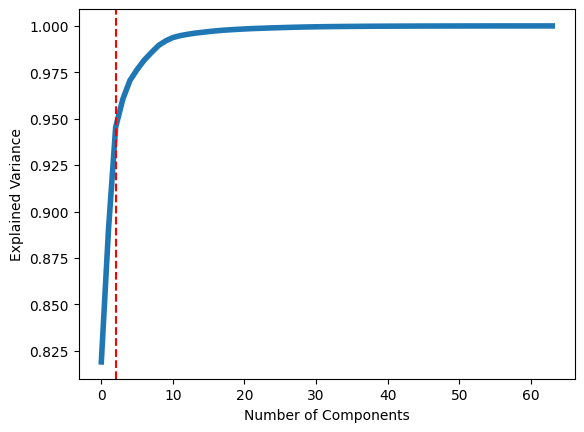

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=4)
plt.axvline(2, linestyle="--", color='r')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [18]:
x_new.shape

(64, 64)

In [54]:
print(pca.explained_variance_ratio_.shape)

(64,)


In [55]:
pca.explained_variance_ratio_[0:20]

array([8.18949390e-01, 7.12233499e-02, 5.51405036e-02, 1.51749669e-02,
       1.01393608e-02, 5.88521964e-03, 5.08292819e-03, 4.05777564e-03,
       3.82422076e-03, 2.48049487e-03, 1.78775009e-03, 9.97103634e-04,
       7.15884972e-04, 5.88867560e-04, 4.72852397e-04, 4.33326590e-04,
       3.86697513e-04, 3.35551090e-04, 2.46200794e-04, 2.33478621e-04])

In [56]:
pca.explained_variance_ratio_.cumsum()[0:4]

array([0.81894939, 0.89017274, 0.94531324, 0.96048821])

Use 4 channels to get 96% of variance

There's only 1 label (Subject 0) for all 64 channels so I can't plot 2 colors...

<AxesSubplot:>

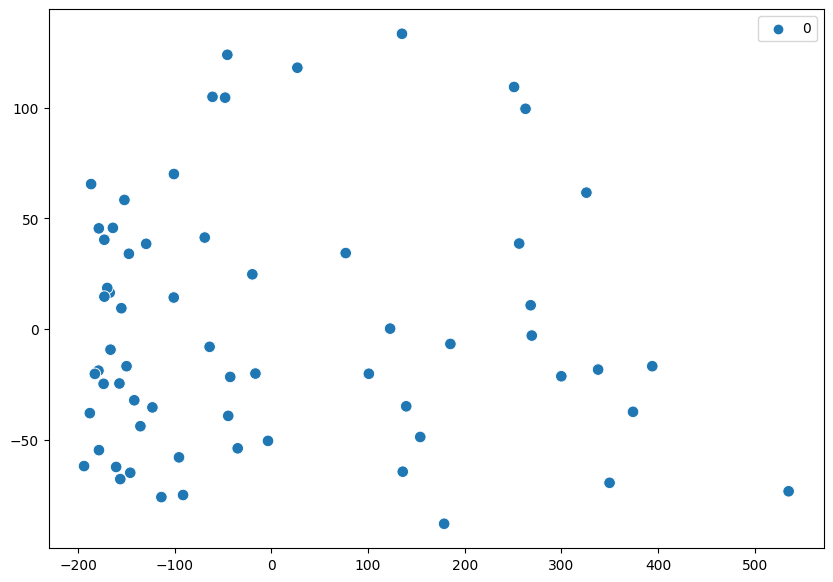

In [73]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1], s=70, hue=np.ravel(Y))#, palette=['green', 'blue'])

In [ ]:
pca_4 = PCA(n_components=4)
pca_4.fit(X)
X_pca_4 = pca_4.transform(X)

# Don't think I can plot 4 dims
plt.figure(figsize=(10, 7))
#plt.scatter(x=X_pca_4[])

components_
> Principal axes in feature space, representing the directions of maximum variance in the data.

> "The components are sorted by explained_variance_."

In [28]:
print(pca.components_.shape)

(64, 208)



array([[ 5.73351008e-03,  5.09058305e-03,  4.03413397e-02, ...,
         1.93248463e-02,  1.14837553e-01,  1.26110777e-01],
       [ 5.29254125e-02,  6.28010889e-02,  7.55924554e-02, ...,
         7.37061645e-02, -8.59149171e-04, -4.26106841e-03],
       [ 7.72688170e-03,  2.91040758e-02,  8.66949484e-02, ...,
         3.96096448e-02,  1.02187655e-01,  6.38842023e-02],
       ...,
       [-9.14114863e-02, -4.33222995e-02,  9.11469062e-03, ...,
        -1.02724555e-01, -3.66379436e-02,  2.21984517e-02],
       [ 1.64996888e-01,  3.21432424e-02,  7.96776688e-02, ...,
        -8.18039982e-02, -2.02541596e-02, -3.23363821e-02],
       [ 1.73390321e-02, -5.30405463e-01,  1.08512015e-01, ...,
        -8.94066049e-05,  6.02019201e-02, -3.73973516e-03]])

In [39]:
print("1st COLUMN")
first_col = pca.components_[:, 0]
print(first_col.sum())
first_col

1st COLUMN
-0.7295996612964459


array([ 5.73351008e-03,  5.29254125e-02,  7.72688170e-03,  3.25388741e-02,
        1.51347679e-02,  8.58764175e-02, -2.43388895e-02, -3.45120000e-02,
        1.06864698e-01, -4.56974973e-02,  6.60106573e-02, -3.68300406e-02,
        2.08570603e-02, -9.09100558e-02,  2.06359637e-02, -6.46312908e-02,
       -2.66470845e-02, -3.61603236e-02, -9.26661457e-02,  6.31975727e-03,
       -6.69338742e-02,  5.24767912e-02,  0.00000000e+00, -8.93003469e-02,
        4.22159103e-02, -5.31866614e-02, -1.96284150e-02,  3.32084589e-02,
       -5.52107883e-02, -7.76593235e-02,  1.96913729e-03, -6.55887005e-02,
       -6.07005978e-03, -2.21371917e-02, -2.58762457e-02,  1.23300270e-01,
       -1.36523328e-02, -3.83597798e-02, -2.47514043e-02,  6.13160889e-02,
       -1.73939754e-02, -4.13954262e-02,  6.16072323e-02,  9.52532751e-02,
       -6.52734119e-02,  6.35806879e-02,  2.24065342e-02, -3.58513468e-03,
        0.00000000e+00, -5.58254904e-02, -4.95292198e-02,  0.00000000e+00,
       -5.73528397e-02, -

In [40]:
print("Top 5 channels")
first_col[first_col <= np.partition(first_col.flatten(), -2)[-5]] = 0
first_col

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08587642, 0.        , 0.        , 0.1068647 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12330027, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09525328, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

# Trying PCA on channels over ALL participants

In [10]:
print(envelope_df.shape)
envelope_df.head()

(7232, 208)


,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,14.129705,11.959808,28.685874,33.823858,42.311438,22.872970,28.686864,91.792338,26.813570,28.583164,...,43.676011,39.113891,27.947874,31.573392,36.614566,35.604320,51.523493,31.292127,59.277122,51.997711
1,13.895036,12.063848,22.026072,27.027048,59.187831,23.013614,30.960467,81.718608,29.116355,28.694447,...,41.396844,44.348191,31.188022,30.580405,32.773796,39.768986,51.494867,29.641406,47.146682,58.581918
2,13.214033,15.229451,23.956005,25.832507,48.218284,29.437285,27.001414,35.878805,29.420835,31.587059,...,27.507856,35.271588,28.060107,24.463167,30.750010,39.033112,31.714344,17.286340,30.174009,49.750919
3,13.979167,16.414878,19.550628,21.984005,32.083749,26.856702,23.001818,21.776800,23.041464,24.603026,...,21.163787,27.844200,26.265045,24.563413,29.984113,35.764448,23.072423,15.670036,22.936556,38.122263
4,10.168381,10.501039,12.856129,16.059131,20.128401,13.435236,16.672336,18.134148,20.744904,21.606347,...,14.751494,19.967234,19.091210,16.293000,20.945203,25.093296,14.147869,10.369884,15.788238,26.206604


In [11]:
print(labels_df.shape)
labels_df.head()

(7232, 1)


,Subject
0,0
1,0
2,0
3,0
4,0


## Now try to figure out if rows actually mean anything
> Eg add a row of all 0s at the beginning of the df to see if this still captures information.  If pca.explained_variance_ratio_ is no longer "sorted" then it isnt sorted to begin with and thus I can just take the top rows

In [114]:
first_subj_df.shape

(64, 208)

In [115]:
TESTING_first_subj_df = first_subj_df.copy(deep=True)
TESTING_first_subj_df.loc[-1] = [0]*208  # adding a row
TESTING_first_subj_df.index = TESTING_first_subj_df.index + 1  # shifting index
TESTING_first_subj_df.sort_index(inplace=True) 

print(TESTING_first_subj_df.shape)
TESTING_first_subj_df.head()

(65, 208)


,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,14.129705,11.959808,28.685874,33.823858,42.311438,22.872970,28.686864,91.792338,26.813570,28.583164,...,43.676011,39.113891,27.947874,31.573392,36.614566,35.604320,51.523493,31.292127,59.277122,51.997711
2,13.895036,12.063848,22.026072,27.027048,59.187831,23.013614,30.960467,81.718608,29.116355,28.694447,...,41.396844,44.348191,31.188022,30.580405,32.773796,39.768986,51.494867,29.641406,47.146682,58.581918
3,13.214033,15.229451,23.956005,25.832507,48.218284,29.437285,27.001414,35.878805,29.420835,31.587059,...,27.507856,35.271588,28.060107,24.463167,30.750010,39.033112,31.714344,17.286340,30.174009,49.750919
4,13.979167,16.414878,19.550628,21.984005,32.083749,26.856702,23.001818,21.776800,23.041464,24.603026,...,21.163787,27.844200,26.265045,24.563413,29.984113,35.764448,23.072423,15.670036,22.936556,38.122263


In [116]:
TESTING_first_subj_labels_df = first_subj_labels_df.copy(deep=True)
TESTING_first_subj_labels_df.loc[-1] = [0]  # adding a row
TESTING_first_subj_labels_df.index = TESTING_first_subj_labels_df.index + 1  # shifting index
TESTING_first_subj_labels_df.sort_index(inplace=True) 

print(TESTING_first_subj_labels_df.shape)
TESTING_first_subj_labels_df.head()

(65, 1)


,Subject
0,0
1,0
2,0
3,0
4,0


In [117]:
X = TESTING_first_subj_df
y = TESTING_first_subj_labels_df

# Maybe don't do SS since negative EMG is weird
# Not using it just flips the figure, as far as I can tell
#scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

In [118]:
print(pca.explained_variance_ratio_.shape)

(65,)


In [119]:
pca.explained_variance_ratio_[0:20]

array([8.19114187e-01, 7.19051552e-02, 5.46854820e-02, 1.56556408e-02,
       9.97130300e-03, 5.78926780e-03, 4.94265919e-03, 3.94526512e-03,
       3.69755216e-03, 2.40379877e-03, 1.72999823e-03, 9.97110833e-04,
       6.95033011e-04, 5.74368479e-04, 4.68882369e-04, 4.23407091e-04,
       3.76150475e-04, 3.24580524e-04, 2.52943358e-04, 2.26771020e-04])

In [120]:
pca.explained_variance_ratio_.cumsum()[0:4]

array([0.81911419, 0.89101934, 0.94570482, 0.96136046])

I don't think this necessarily tells me what I wanted, it still concievable could be the case that the all zero row still captures a lot of variance maybe?

# OLD CODE: Pipeline for Finding n_components
Choosing just 2 components was super arbitrary, ought to do some analysis

In [52]:
def do_pca(num_cs, input_df):
    pca=PCA(n_components=num_cs)
    pca.fit(input_df)
    x_pca=pca.transform(input_df)

    return x_pca

Could drop channel column, or combine subject and channel into 1 label. Dropping channel column is easiest but presumably loses some info (eg if channel is place over same muscle that could provide a better matching criterion, but this may be counteracted if the two blocks had sensors placed in different places

In [43]:
emg_labels_df.head()

,Subject,Condition,Channel
0,METACPHS_S106,0,0
1,METACPHS_S106,0,1
2,METACPHS_S106,0,2
3,METACPHS_S106,0,3
4,METACPHS_S106,0,4


In [44]:
# Also drop condition for now
emg_labels_NC_df = emg_labels_df.drop(['Channel', 'Condition'], axis=1)
emg_labels_NC_df["Subject"] = emg_labels_NC_df["Subject"].map(key_to_num)
print(emg_labels_NC_df.shape)
emg_labels_NC_df.head()

(7232, 1)


,Subject
0,METACPHS_S106
1,METACPHS_S106
2,METACPHS_S106
3,METACPHS_S106
4,METACPHS_S106


In [47]:
emgPCA_res_df = pd.DataFrame(columns=my_metrics_cols)
emgPCA_res_df.head()

,Algorithm,One Off Acc,CV Acc,K Folds


In [ ]:

emg_PCA_df2 = pd.DataFrame(do_pca(2, emg_data_df))
emg_PCA_df3 = pd.DataFrame(do_pca(3, emg_data_df))
emg_PCA_df5 = pd.DataFrame(do_pca(5, emg_data_df))
emg_PCA_df7 = pd.DataFrame(do_pca(7, emg_data_df))
emg_PCA_df10 = pd.DataFrame(do_pca(10, emg_data_df))
emg_PCA_df20 = pd.DataFrame(do_pca(20, emg_data_df))

my_pca_dfs = [emg_PCA_df2, emg_PCA_df3, emg_PCA_df5, emg_PCA_df7, emg_PCA_df10, emg_PCA_df20]

In [ ]:
for my_input_df in my_pca_dfs:
    X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(my_input_df, emg_labels_NC_df)
    y_train = np.ravel(y_train)

    # Need to keep track of what condition was used when... appending a column after?
    #emgPCA_res_df = pd.DataFrame(columns=my_metrics_cols)

    for model in my_models:
        emgPCA_res_df = train_model(model, X_train, y_train, cv, emgPCA_res_df)

In [ ]:
emgPCA_res_df.head(100)

In [ ]:
# Do some code to add a column
num_comp_col = np.zeros((len(my_pca_dfs)*len(my_models), 1))

#for i in range():
#    num_comp_col

In [ ]:
emgPCA_res_df.head(100)